In [1]:
import tensorflow 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:

## RNN & LTSM

In [10]:
import numpy as np
from random import shuffle

In [8]:
train_input = ['{0:020b}'.format(i) for i in range(2**20)]

In [11]:
shuffle(train_input)

In [13]:
train_input = [map(int,i) for i in train_input]
ti= []

In [14]:
for i in train_input:
    temp_list = []
    for j in i:
        temp_list.append([j])
    ti.append(np.array(temp_list))
train_input = ti

In [16]:


import numpy as np

def leaky_relu(x):
    y = np.maximum(np.zeros(len(x)), x) +  0.4 * np.minimum(np.zeros(len(x)), x)
    return y

def sigmoid(x, derivative=False):
    if (derivative == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 1
                else:
                    x[i][k] = 0
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                pass  # do nothing since it would be effectively replacing x with x
            else:
                x[i][k] = 0
    return x

def arctan(x, derivative=False):
    if (derivative == True):
        return (np.cos(x) ** 2)
    return np.arctan(x)

def step(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 0
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                x[i][k] = 1
            else:
                x[i][k] = 0
    return x

def squash(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(0, len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = (x[i][k]) / (1 + x[i][k])
                else:
                    x[i][k] = (x[i][k]) / (1 - x[i][k])
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            x[i][k] = (x[i][k]) / (1 + abs(x[i][k]))
    return x

def gaussian(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(0, len(x[i])):
                x[i][k] = -2* x[i][k] * np.exp(-x[i][k] ** 2)
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            x[i][k] = np.exp(-x[i][k] ** 2)
    return x

In [21]:
x = np.arange(-3,3,0.1)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

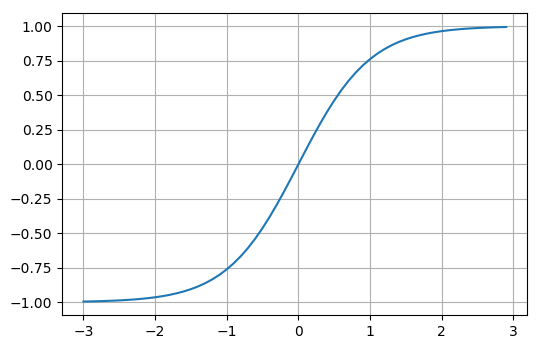

In [28]:
plt.plot(x, tanh(x))
plt.grid(True)

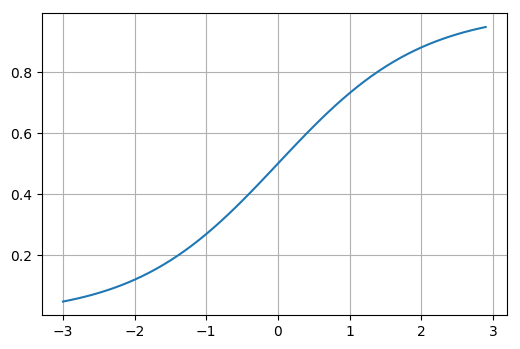

In [29]:
plt.plot(x, sigmoid(x))
plt.grid(True)

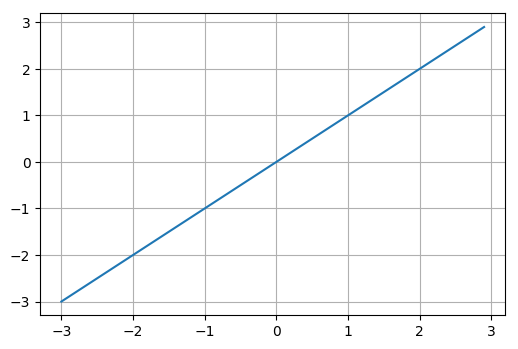

In [30]:
plt.plot(x, x)
plt.grid(True)

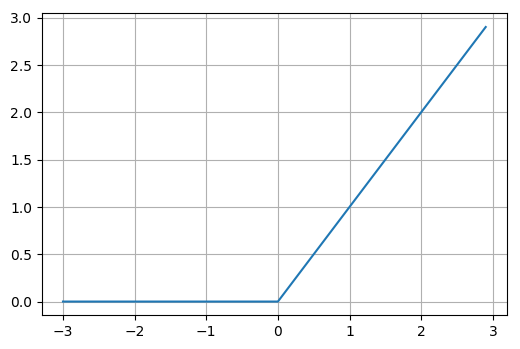

In [39]:
plt.plot(x, np.maximum(np.zeros(len(x)), x))
plt.grid(True)

In [38]:
np.maximum(np.zeros(len(x)), x)

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.66453526e-15,   1.00000000e-01,   2.00000000e-01,
         3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
         6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
         9.00000000e-01,   1.00000000e+00,   1.10000000e+00,
         1.20000000e+00,   1.30000000e+00,   1.40000000e+00,
         1.50000000e+00,   1.60000000e+00,   1.70000000e+00,
         1.80000000e+00,

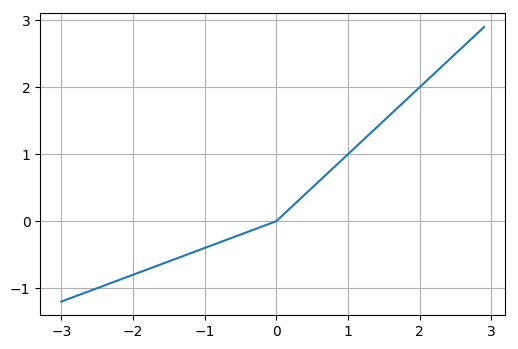

In [41]:
def leaky_relu(x):
    y = np.maximum(np.zeros(len(x)), x) +  0.4 * np.minimum(np.zeros(len(x)), x)
    return y

plt.plot(x, leaky_relu(x))
plt.grid(True)

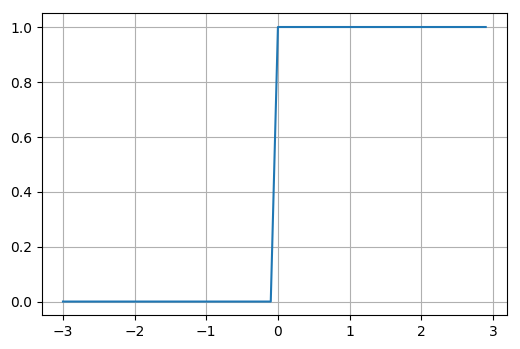

In [43]:
def step_function(x):
    y = (x/abs(x) + 1) * 0.5
    return y

plt.plot(x, step_function(x))
plt.grid(True)

In [44]:
from datetime import date, timedelta

first_day_of_current_month = date.today().replace(day=1)
last_day_of_previous_month = first_day_of_current_month - timedelta(days=1)

print "Previous month:", last_day_of_previous_month.month

Previous month: 9


In [61]:
import datetime
def last_day_of_month(date):
    
    #if date.month == 12:
    #    result = date.replace(day=31)
    #else:
    result = date.replace(month=date.month, day=1) - datetime.timedelta(days=1)
    return result

s = '20170101'
d = datetime.date(int(s[:4]), int(s[4:6]), int(s[6:]))
c = last_day_of_month(d)

In [64]:
"{:%Y/%m/%d}".format(c)

'2016/12/31'

In [63]:
print c

2016-12-31


In [67]:
c.strftime("%Y/%m/%d")

'2016/12/31'

In [69]:
import os
os.sep

'/'